<a href="https://colab.research.google.com/github/yurifreire2007/bootcamp_alura/blob/main/Projeto_M%C3%B3dulo_01_Yuri_Freire_VF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resumo:


Olá!

Para iniciar o resumo, acho válido uma breve introdução. Me chamo Yuri e trabalho em uma **operadora de saúde** desde 2016. Atuo como analista de dados, na área responsável pela análise de **custo e sinsitro em Saúde Suplementar**. Sendo assim, meu objetivo neste primeiro projeto é buscar analisar o custo de algum **procedimento específico**,no qual eu tenha **experiência** e ainda com **relevância** nas bases de produção Hospitalar do SUS.

Para este meu notebook, seguem principais destaques:



*   A maior parte das análises presentes no notebook, contemplam dados **financeiros**. Apenas nos "Dados - Estado Paraná" utilizei os dados por **números de internações**;
*  Apesar de ter uma certa experiência em Saúde, conheço poucos detalhes do SUS, então decidir fazer uma **análise em camadas**, partindo de uma visão mais ampla, para ir afunilando ao decorrer do estudo.
*  Acredito na importância de criar **métodos replicáveis**, com a possibilidade da expansão do estudo, compartilhando com outras pessoas. Com isso, na maioria das aberturas que fiz, fui seguindo, basicamente, o mesmo método que realizei na primeira analise.
*  Seguindo o Índice criado, é possível entender quais aberturas eu fiz e como fui detalhando até chegar no tema principal: **Gastroplastia**.
* O Estado do **Paraná** se destaca no **valor total gasto em Bariátrica**. Por quê?
*  **Hospital Angelina Caron**, é a chave do motivo de destaque do Paraná em procedimentos de bariátricas no Brasil. Veja a conclusão e se surpreenda!
*   Além da conclusão das trativas de dados, trago também minhas **considerações finais do projeto**, buscando uma visão mais geral do que encontrei nesta primeira etapa de estudo.














# Análise dos dados:



## Visão Geral - Dados Sus


Objetivo: Visualizar os dados de uma forma mais ampla para depois escolher em qual tema aprofundar;


Olá!

Conforme mencionado no resumo, irei fazer uma análise por camadas. Meu objetivo neste primeiro projeto é encontrar algum **procedimento específico**, que se alinhe com meu conhecimento e  relevância na bases que serão estudadas.

### Abertura - Grupo de Procedimentos;


In [1]:
#bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import  matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para iniciar o estudo, a primeira pergunta que me fiz foi a seguinte: "Como é o comprtamente  dos **valores pagos de internações**, ao longo dos anos, no ambimente hospitalar do SUS?"

Tendo isso em mente, nada mais justo fazer uma análise mais ampla da base, para que, depois, me aprofunde mais.

In [3]:
  ##Importando Dados de Valor Internação Total por Grupo de serviço /mês de atendimento, a partir de 2008 até 2020;

dados= pd.read_csv ('/content/drive/My Drive/Data Science/bootcamp Alura/Módulo 1/Super Desafio/Bases/evolucao_grupoprocedimento.csv',encoding='ISO-8859-1',sep=';', skiprows=3, skipfooter=11, decimal=',',na_values='-')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
#Visualizar dados importados 
dados

,Grupo procedimento,1989,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,02 Procedimentos com finalidade diagnóstica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.691183e+05,1.287448e+07,1.792743e+07,2.077782e+07,2.491927e+07,2.653933e+07,1.303000e+07,1.466952e+07,1.930619e+07,2.164426e+07,2.210342e+07,2.414181e+07,2.739648e+07,1.298444e+07,2.588836e+08
1,03 Procedimentos clínicos,1242.43,186041.09,51693.15,103140.29,137525.2,108916.25,106478.35,114240.98,3998430.76,818653.05,366682.61,901445.18,271870.15,362145.69,796646.6,723591.58,981384.29,2.761578e+08,5.738135e+09,5.137666e+09,5.392210e+09,5.424377e+09,5.474784e+09,5.680497e+09,5.859573e+09,6.017236e+09,6.133357e+09,6.318746e+09,6.513817e+09,6.763643e+09,4.588031e+09,7.532826e+10
2,04 Procedimentos cirúrgicos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.859961e+08,3.936368e+09,4.618195e+09,5.033940e+09,5.421616e+09,5.683922e+09,6.405891e+09,6.866953e+09,6.982443e+09,7.096472e+09,7.454315e+09,7.834148e+09,8.183100e+09,3.993362e+09,7.979672e+10
3,"05 Transplantes de orgãos, tecidos e células",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.670447e+07,2.328190e+08,2.806390e+08,3.046266e+08,3.564129e+08,4.389097e+08,5.531893e+08,5.824294e+08,5.800797e+08,6.122036e+08,6.769960e+08,7.051621e+08,7.454668e+08,3.612452e+08,6.446884e+09
4,Total,1242.43,186041.09,51693.15,103140.29,137525.2,108916.25,106478.35,114240.98,3998430.76,818653.05,366682.61,901445.18,271870.15,362145.69,796646.6,723591.58,981384.29,5.794274e+08,9.920197e+09,1.005443e+10,1.075155e+10,1.122733e+10,1.162416e+10,1.265261e+10,1.332362e+10,1.359906e+10,1.386368e+10,1.447216e+10,1.507727e+10,1.571961e+10,8.955622e+09,1.618307e+11


In [5]:
##Apenas visualização de todas colunas para facilitar na escolha de colunas;
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,'Grupo procedimento')
print(colunas_usaveis)

['Grupo procedimento', '1989', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Total']


In [6]:
#Delimitando quais colunas irei visualizar "A partir de 2018 até 2019"

usaveis = dados[['Grupo procedimento','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
usaveis

,Grupo procedimento,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,02 Procedimentos com finalidade diagnóstica,1.287448e+07,1.792743e+07,2.077782e+07,2.491927e+07,2.653933e+07,1.303000e+07,1.466952e+07,1.930619e+07,2.164426e+07,2.210342e+07,2.414181e+07,2.739648e+07
1,03 Procedimentos clínicos,5.738135e+09,5.137666e+09,5.392210e+09,5.424377e+09,5.474784e+09,5.680497e+09,5.859573e+09,6.017236e+09,6.133357e+09,6.318746e+09,6.513817e+09,6.763643e+09
2,04 Procedimentos cirúrgicos,3.936368e+09,4.618195e+09,5.033940e+09,5.421616e+09,5.683922e+09,6.405891e+09,6.866953e+09,6.982443e+09,7.096472e+09,7.454315e+09,7.834148e+09,8.183100e+09
3,"05 Transplantes de orgãos, tecidos e células",2.328190e+08,2.806390e+08,3.046266e+08,3.564129e+08,4.389097e+08,5.531893e+08,5.824294e+08,5.800797e+08,6.122036e+08,6.769960e+08,7.051621e+08,7.454668e+08
4,Total,9.920197e+09,1.005443e+10,1.075155e+10,1.122733e+10,1.162416e+10,1.265261e+10,1.332362e+10,1.359906e+10,1.386368e+10,1.447216e+10,1.507727e+10,1.571961e+10


Delimitei a base apenas em anos que tenham todos os meses completos;


In [7]:
#Grupo de procedimento como index
usaveis = usaveis.set_index('Grupo procedimento')

In [8]:
#tirando o total
usaveis = usaveis.drop('Total', axis=0)

Para começar a responder meu indagamento principal (Comportamento dos procedimentos no ambiente hospitalar do SUS), decidi seguir pela linha visual;

Text(0.5, 1.0, 'Evolução do valor total de internações por grupo de Procedimento')

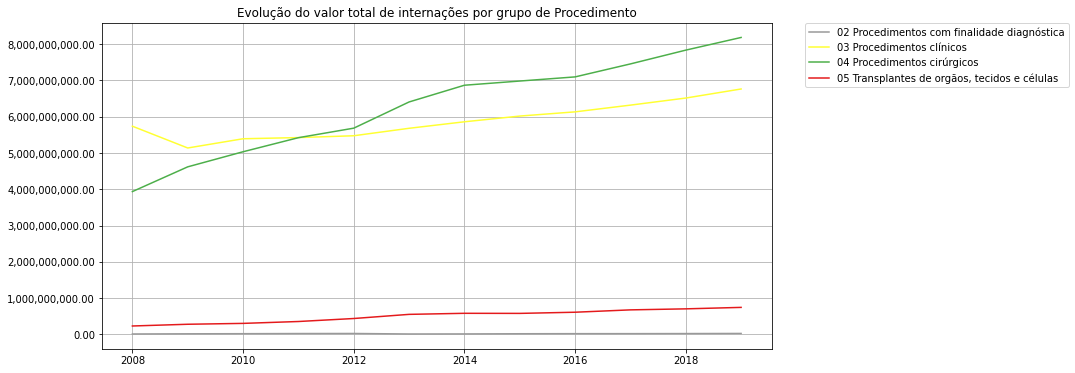

In [9]:
#Gráfico para visualização dos dados

ax = usaveis.T.plot(figsize=(12,6),colormap='Set1_r',grid=True)
# Colocando a legenda à direita do plot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
#altera a formatação do eixo y para um float com duas casas decimais - incluindo o separador
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
#titulo
plt.title ('Evolução do valor total de internações por grupo de Procedimento')

Após analisar gráfico, os **procedimentos cirúrgicos e clínico**s me chamaram atenção, por isso vou querer visualizar os dois de uma forma mais clara

In [10]:
#reincluindo a coluna Total
usaveis['Total'] =  usaveis.sum(axis=1)
#ordenando as linhas pela coluna 'Total' do maior para o menor
ordenado_por_total = usaveis.sort_values(by='Total', ascending=False)
ordenado_por_total.drop('Total', axis=1, inplace=True)

(0.0, 8395436216.5395)

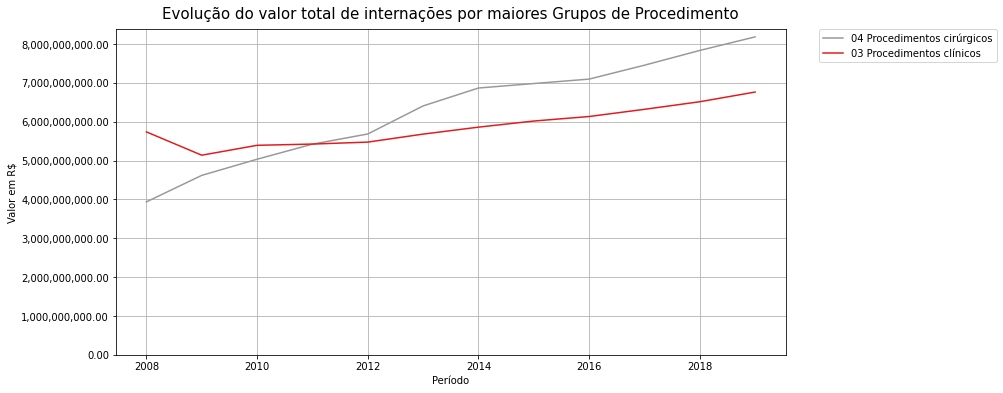

In [11]:
#Gráfico somente com Procedimentos Cirúrgicos e 03 procedimentos Clínicos
colunas = ordenado_por_total.columns[0:len(ordenado_por_total.columns)]
ax = ordenado_por_total[colunas].head(2).T.plot(figsize=(12,6), cmap='Set1_r',grid=True)
plt.title('Evolução do valor total de internações por maiores Grupos de Procedimento', fontsize=15,pad=10);
#altera a formatação do eixo y para um float com duas casas decimais - incluindo o separador
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# Colocando a legenda à direita do plot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel('Período')
ax.set_ylabel('Valor em R$');
#Ajustando limite do eixo Y
plt.ylim(0)






Após esse gráfico decidi abrir mais os dados, em subgrupos, já com uma maior inclinação para buscar procedimentos relacionados à "Procedimentos cirúrgicos ou Clínicos";

### Abertura - Subgrupo Procedimentos;


In [12]:

##Importando dados de Valor_total por sub grupo de procedimento, por ano de atendimento:  2009 até 2020

dados_subgrupo = pd.read_csv ('/content/drive/My Drive/Data Science/bootcamp Alura/Módulo 1/Super Desafio/Bases/evolucao_subgrupo.csv',encoding='ISO-8859-1',sep=';', skiprows=3, skipfooter=12
                              , decimal=',',na_values='-')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


In [13]:
##Visualizando a importação
dados_subgrupo.head()

,Subgrupo proced.,1989,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,0201 Coleta de material,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.886425e+05,9.083482e+06,1.278893e+07,1.485683e+07,1.815497e+07,1.937756e+07,4.226195e+06,4.895202e+06,5.200932e+06,5.858066e+06,6.280192e+06,6.518230e+06,6.744176e+06,3.386588e+06,1.177600e+08
1,0209 Diagnóstico por endoscopia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.526387e+04,1.283198e+06,2.433537e+06,2.893411e+06,3.717646e+06,4.046105e+06,5.169410e+06,6.073639e+06,9.842960e+06,1.076200e+07,1.051814e+07,1.216240e+07,1.455794e+07,7.891816e+06,9.144747e+07
2,0211 Métodos diagnósticos em especialidades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.521189e+04,2.507800e+06,2.704960e+06,3.027573e+06,3.046659e+06,3.115671e+06,3.634393e+06,3.700675e+06,4.262301e+06,5.024190e+06,5.305095e+06,5.461178e+06,6.094360e+06,1.706041e+06,4.967611e+07
3,0301 Consultas / Atendimentos / Acompanhamentos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.458042e+06,2.287254e+07,2.568300e+07,3.099806e+07,3.441507e+07,3.405987e+07,3.536497e+07,4.103019e+07,4.465532e+07,4.920561e+07,5.190948e+07,4.567517e+07,4.434230e+07,2.510491e+07,4.867745e+08
4,0303 Tratamentos clínicos (outras especialidades),1242.43,186041.09,51693.15,103140.29,137525.2,108916.25,106478.35,114240.98,3998430.76,818653.05,366682.61,901445.18,271870.15,362145.69,796646.6,723591.58,981384.29,2.275147e+08,4.817085e+09,4.083690e+09,4.334216e+09,4.337106e+09,4.386720e+09,4.535886e+09,4.631387e+09,4.712607e+09,4.823044e+09,4.944171e+09,5.105589e+09,5.334472e+09,3.800815e+09,6.008433e+10


In [14]:
#Visualização das colunas
colunas_usaveis2 = dados.mean().index.tolist()
colunas_usaveis2.insert(0,'Subgrupo proced.')
print(colunas_usaveis2)

['Subgrupo proced.', '1989', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Total']


In [15]:
#Escolhendo somente os anos de 2008 até 2019
usaveis_subgrupo = dados_subgrupo[['Subgrupo proced.','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','Total']]
usaveis_subgrupo.head()

,Subgrupo proced.,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,0201 Coleta de material,9.083482e+06,1.278893e+07,1.485683e+07,1.815497e+07,1.937756e+07,4.226195e+06,4.895202e+06,5.200932e+06,5.858066e+06,6.280192e+06,6.518230e+06,6.744176e+06,1.177600e+08
1,0209 Diagnóstico por endoscopia,1.283198e+06,2.433537e+06,2.893411e+06,3.717646e+06,4.046105e+06,5.169410e+06,6.073639e+06,9.842960e+06,1.076200e+07,1.051814e+07,1.216240e+07,1.455794e+07,9.144747e+07
2,0211 Métodos diagnósticos em especialidades,2.507800e+06,2.704960e+06,3.027573e+06,3.046659e+06,3.115671e+06,3.634393e+06,3.700675e+06,4.262301e+06,5.024190e+06,5.305095e+06,5.461178e+06,6.094360e+06,4.967611e+07
3,0301 Consultas / Atendimentos / Acompanhamentos,2.287254e+07,2.568300e+07,3.099806e+07,3.441507e+07,3.405987e+07,3.536497e+07,4.103019e+07,4.465532e+07,4.920561e+07,5.190948e+07,4.567517e+07,4.434230e+07,4.867745e+08
4,0303 Tratamentos clínicos (outras especialidades),4.817085e+09,4.083690e+09,4.334216e+09,4.337106e+09,4.386720e+09,4.535886e+09,4.631387e+09,4.712607e+09,4.823044e+09,4.944171e+09,5.105589e+09,5.334472e+09,6.008433e+10


In [16]:
#setando o index
usaveis_subgrupo = usaveis_subgrupo.set_index('Subgrupo proced.')

In [17]:
#ordenando as linhas pela coluna 'Total' do maior para o menor
ordenado_por_total_2 = usaveis_subgrupo.sort_values(by='Total', ascending=False)
ordenado_por_total_2.drop('Total', axis=1, inplace=True)

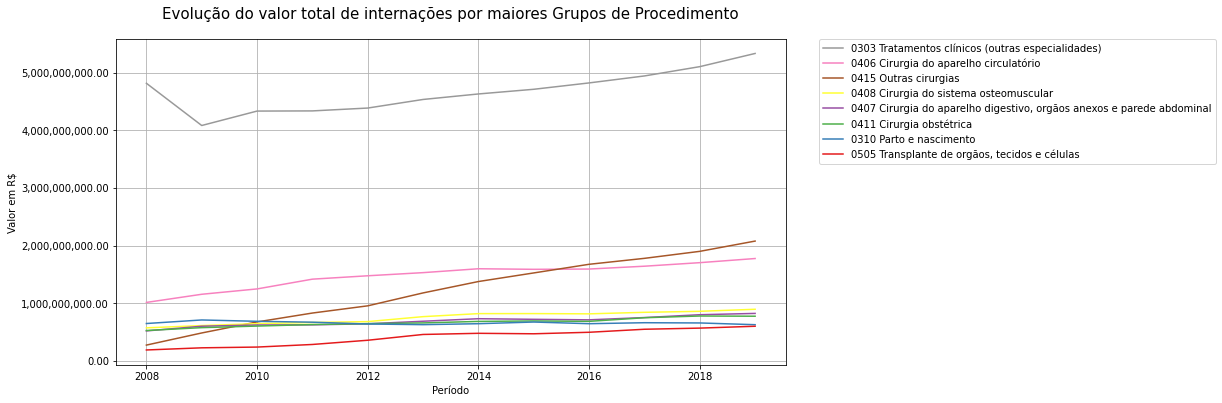

In [18]:
#plotando só a partir de 2008 (8 maiores subgrupos)
colunas = ordenado_por_total_2.columns[0:len(ordenado_por_total.columns)]
ax = ordenado_por_total_2[colunas].head(8).T.plot(figsize=(12,6), cmap='Set1_r',grid=True)
plt.title('Evolução do valor total de internações por maiores Grupos de Procedimento', fontsize=15,pad=20);
#altera a formatação do eixo y para um float com duas casas decimais - incluindo o separador
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# Colocando a legenda à direita do plot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel('Período')
ax.set_ylabel('Valor em R$');





Até o momento, decidi seguir a mesma linha de raciocínio utilizada na primeira parte da análise.

A partir de agora, irei analisar apenas os subgrupos com maior valor total, porém retirando alguns que considerei serem mais genéricos e que possam agrupar procedimentos de diversas especialidades;

Outro ponto que notei foi que, em linhas gerais, os subgrupos relacionados a procedimentos cirúrgicos ou clínicos, se destacam, corroborando com a primeira parte da análise "Abertura - Grupo de Procedimentos";



In [19]:

ordenado_por_total_2.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Subgrupo proced.,,,,,,,,,,,,
0303 Tratamentos clínicos (outras especialidades),4.817085e+09,4.083690e+09,4.334216e+09,4.337106e+09,4.386720e+09,4.535886e+09,4.631387e+09,4.712607e+09,4.823044e+09,4.944171e+09,5.105589e+09,5.334472e+09
0406 Cirurgia do aparelho circulatório,1.011702e+09,1.153294e+09,1.246179e+09,1.415726e+09,1.474414e+09,1.528902e+09,1.596478e+09,1.586634e+09,1.591415e+09,1.640606e+09,1.702158e+09,1.774002e+09
0415 Outras cirurgias,2.708965e+08,4.813953e+08,6.730284e+08,8.274706e+08,9.525663e+08,1.176799e+09,1.374554e+09,1.523858e+09,1.673891e+09,1.777149e+09,1.898622e+09,2.076911e+09
0408 Cirurgia do sistema osteomuscular,5.703886e+08,6.097371e+08,6.432238e+08,6.636368e+08,6.788770e+08,7.649137e+08,8.172602e+08,8.178534e+08,8.135101e+08,8.400077e+08,8.575131e+08,8.929904e+08
"0407 Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal",5.169350e+08,5.985287e+08,6.199519e+08,6.222163e+08,6.406686e+08,6.850805e+08,7.289045e+08,7.184448e+08,7.096038e+08,7.491253e+08,7.983381e+08,8.209667e+08


In [20]:
#retirando dados que não gostaria de trabalhar (possibilidade de serem genéricos e menor conhecimento, deixando apenas procedimentos cirúrgicos e clínicos)
ordenado_por_total_2 = ordenado_por_total_2.drop('0303 Tratamentos clínicos (outras especialidades)', axis=0)
ordenado_por_total_2 = ordenado_por_total_2.drop('0415 Outras cirurgias', axis=0)
ordenado_por_total_2 = ordenado_por_total_2.drop('0505 Transplante de orgãos, tecidos e células', axis=0)


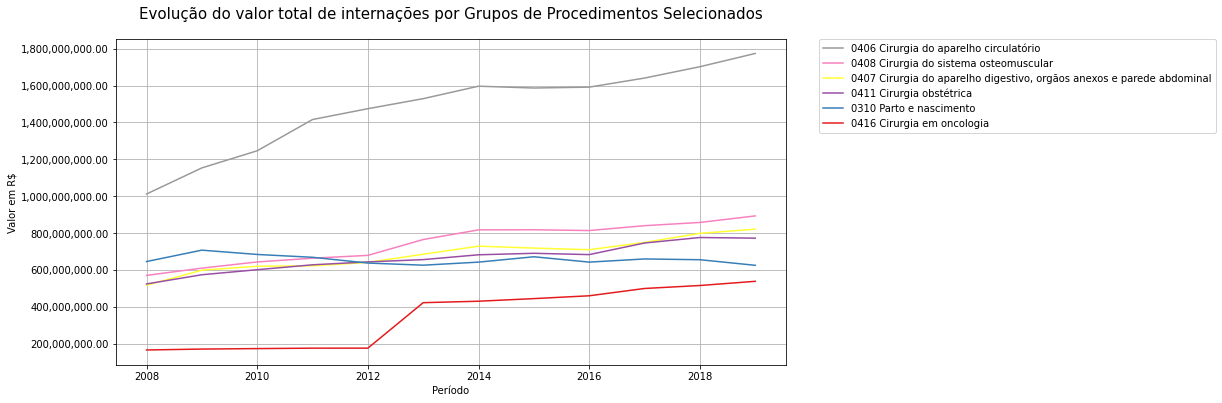

In [21]:
#Gráfico sem as especialidades '0303' e '0415' - Top 7
colunas = ordenado_por_total_2.columns[0:len(ordenado_por_total_2.columns)]
ax = ordenado_por_total_2[colunas].head(6).T.plot(figsize=(12,6), cmap='Set1_r',grid=True)
plt.title('Evolução do valor total de internações por Grupos de Procedimentos Selecionados', fontsize=15,pad=20);
#altera a formatação do eixo y para um float com duas casas decimais - incluindo o separador
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# Colocando a legenda à direita do plot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel('Período')
ax.set_ylabel('Valor em R$');



Conforme mencionado no início desta etapa de análise dados, o objetivo desta primeira etapa seria encontrar prrocedimentos que tenha **relevâncica** na base do SUS e que eu também tenha certo **conhecimento**;
Então, dentro da minha experiência profissional,dos subgrupos apresentados no gráfico, o que tenho mais familiaridade é o '0407 - Cirurgia do Aparelho Digestivo" e "Parto/obstétrica".


Apesar dos dados relacionados a C Parto terem me chamado bastante atenção, decidi entrar em detalhe no subgrupo '**Ap. Digestivo'**, por **maior experiência** nos procedimentos presentes no sub_grupo, além de terem uma gama de **procedimentos eletivos** que, possam facilitar em uma ação de contenção mais direta e, em  alguns casos, com resultados mais palpáveis no curto prazo;



### Abertura - Aparelho Digestivo, orgãos anexos e parede abdominal

In [22]:
##Importando dados do Subgrupo AP_DIGESTIVO -Jan/08 até Ago/20

base_ap_digestivo = pd.read_csv ('/content/drive/My Drive/Data Science/bootcamp Alura/Módulo 1/Super Desafio/Bases/0407 Cirurgia do aparelho digestivo_por_proced.csv',encoding='ISO-8859-1',sep=';', skiprows=4, skipfooter=11, decimal=',',na_values='-')
base_ap_digestivo.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Procedimento,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
112,0407040234 RESSECCAO DO EPIPLOM,6187.11,2.157815e+05,1.675650e+05,2.322866e+05,1.910099e+05,1.758701e+05,1.418350e+05,2.074867e+05,1.578080e+05,1.218583e+05,2.140755e+05,1.685801e+05,2.305513e+05,1.053971e+05,2.336292e+06
113,0407040242 RESSUTURA DE PAREDE ABDOMINAL (POR ...,1041590.97,9.215361e+06,1.235864e+07,1.226177e+07,1.290132e+07,1.347979e+07,1.363941e+07,1.391035e+07,1.380650e+07,1.521528e+07,1.497535e+07,1.564833e+07,1.555839e+07,7.400249e+06,1.714124e+08
114,0407040250 TRATAMENTO CIRURGICO DE PERITONITE,62735.51,1.000825e+06,2.012651e+06,2.279961e+06,2.712989e+06,3.294146e+06,4.145576e+06,4.555070e+06,5.007898e+06,4.904426e+06,4.919088e+06,4.947032e+06,5.055684e+06,2.311015e+06,4.720910e+07
115,0407040269 VAGOTOMIA VIDEOLAPAROSCOPICA,NaN,2.730430e+03,3.392840e+03,2.456130e+03,NaN,1.620320e+03,8.620600e+02,8.778500e+02,2.612180e+03,4.690240e+03,1.596120e+03,2.530212e+04,NaN,NaN,4.614029e+04
116,Total,33614477.57,5.169350e+08,5.985287e+08,6.199519e+08,6.222163e+08,6.406686e+08,6.850805e+08,7.289045e+08,7.184448e+08,7.096038e+08,7.491253e+08,7.983381e+08,8.209667e+08,3.131541e+08,8.555533e+09


Objetivo: Seguir a mesma Linha de raciocínio feita nas análises de Grupo e Subgrupo Procedimentos;

In [23]:
#Slice nas colunas
base_ap_digestivo_filtro = base_ap_digestivo[['Procedimento','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','Total']]
base_ap_digestivo.head()

,Procedimento,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,0407010017 DEGASTROGASTRECTOMIA C/ OU S/ VAGOT...,9716.82,95628.06,100797.72,111375.77,126175.94,99518.19,73028.62,115165.06,156434.06,85487.48,88765.35,134031.75,69702.44,27085.85,1292913.11
1,0407010033 ESOFAGECTOMIA DISTAL C/ TORACOTOMIA,44867.77,328141.94,323170.14,347679.71,289990.59,300509.43,441679.35,365145.54,386821.66,334357.72,223780.39,310275.70,346776.68,86622.47,4129819.09
2,0407010041 ESOFAGECTOMIA DISTAL S/ TORACOTOMIA,40536.21,357074.84,348559.89,331026.17,328787.43,306950.42,318745.83,258280.09,334071.43,195434.27,217120.72,210861.26,277284.99,98759.74,3623493.29
3,0407010050 ESOFAGECTOMIA VIDEOLAPAROSCOPICA,1413.15,23577.35,16723.90,65094.73,50322.88,65417.47,76802.08,64741.28,75717.11,140595.71,79307.59,116467.35,119591.69,64540.41,960312.70
4,0407010068 ESOFAGO-COLONPLASTIA,107510.31,634702.31,642355.43,692357.68,633573.08,423445.04,720663.84,467845.58,556621.32,579276.10,581946.68,526638.77,493867.80,87163.35,7147967.29


In [24]:
#index procedimento
base_ap_digestivo_filtro = base_ap_digestivo_filtro.set_index('Procedimento')

In [25]:
#Ordenando e retirando totais
base_ap_digestivo_filtro_ordenado = base_ap_digestivo_filtro.sort_values(by='Total', ascending=False)
base_ap_digestivo_filtro_ordenado.drop('Total', axis=1, inplace=True)
base_ap_digestivo_filtro_ordenado = base_ap_digestivo_filtro_ordenado.drop('Total',axis=0)
base_ap_digestivo_filtro_ordenado.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Procedimento,,,,,,,,,,,,
0407030026 COLECISTECTOMIA,89008778.62,1.001310e+08,1.037184e+08,1.023465e+08,1.046823e+08,1.150774e+08,1.213461e+08,1.128659e+08,1.008721e+08,1.046680e+08,1.171952e+08,1.157136e+08
0407040161 LAPAROTOMIA EXPLORADORA,52688122.91,6.228848e+07,6.303410e+07,6.552171e+07,6.815126e+07,6.892457e+07,7.009838e+07,6.704127e+07,6.672180e+07,6.693298e+07,6.768991e+07,6.879467e+07
0407040102 HERNIOPLASTIA INGUINAL / CRURAL (UNILATERAL),56373885.72,6.100353e+07,6.203135e+07,6.019787e+07,5.977898e+07,6.339749e+07,6.798749e+07,6.379681e+07,5.737480e+07,6.243704e+07,7.016444e+07,7.037555e+07
0407020039 APENDICECTOMIA,40824839.40,5.142453e+07,5.313519e+07,5.217402e+07,5.612616e+07,5.821625e+07,6.022984e+07,6.295081e+07,6.287274e+07,6.532195e+07,6.681863e+07,7.089272e+07
0407030034 COLECISTECTOMIA VIDEOLAPAROSCOPICA,13433599.28,1.987289e+07,2.597979e+07,3.032507e+07,3.405392e+07,4.291502e+07,5.453968e+07,5.995945e+07,6.125453e+07,7.262375e+07,7.725991e+07,8.193925e+07


(0.0, 126741750.803)

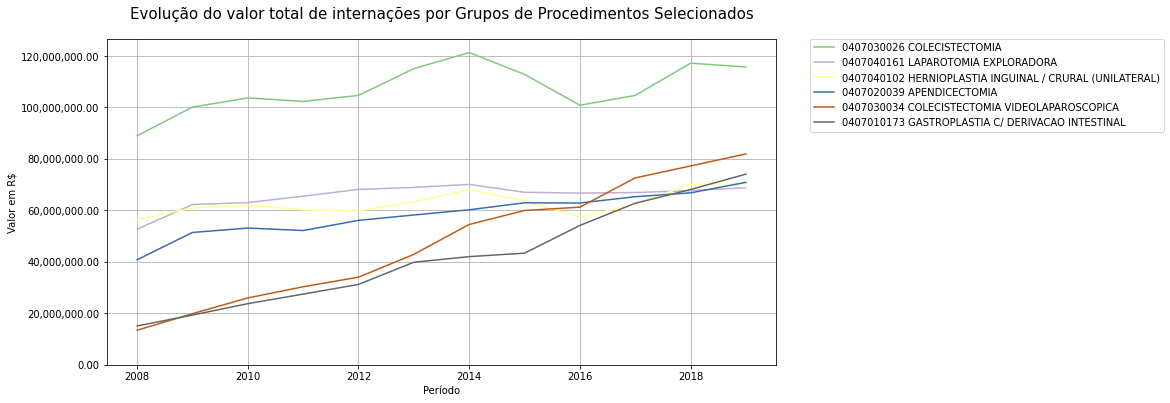

In [26]:
# Gráfico para entender a evolução dos procedimentos
colunas = base_ap_digestivo_filtro_ordenado.columns[0:len(base_ap_digestivo_filtro_ordenado.columns)]
ax = base_ap_digestivo_filtro_ordenado[colunas].head(6).T.plot(figsize=(12,6), colormap='Accent',grid=True)
plt.title('Evolução do valor total de internações por Grupos de Procedimentos Selecionados', fontsize=15,pad=20);
#altera a formatação do eixo y para um float com duas casas decimais - incluindo o separador
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# Colocando a legenda à direita do plot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel('Período')
ax.set_ylabel('Valor em R$');
plt.ylim(0)


Conforme mencionado anteriormente, como meu intuito é analisar os custos, decidi verificar os maiores procedimentos**(relevância)** e, além disso, um outro critério que adicionarei a partir de agora será o **aumento dos custos** ao longo dos anos;

In [27]:
##Retirados procedimentos que não tem uma curva tão acentuada de crescimento (visulamente)

base_ap_digestivo_filtro_ordenado = base_ap_digestivo_filtro_ordenado.drop(['0407040161 LAPAROTOMIA EXPLORADORA','0407040102 HERNIOPLASTIA INGUINAL / CRURAL (UNILATERAL)','0407020039 APENDICECTOMIA'],axis=0)


(0.0, 126741750.803)

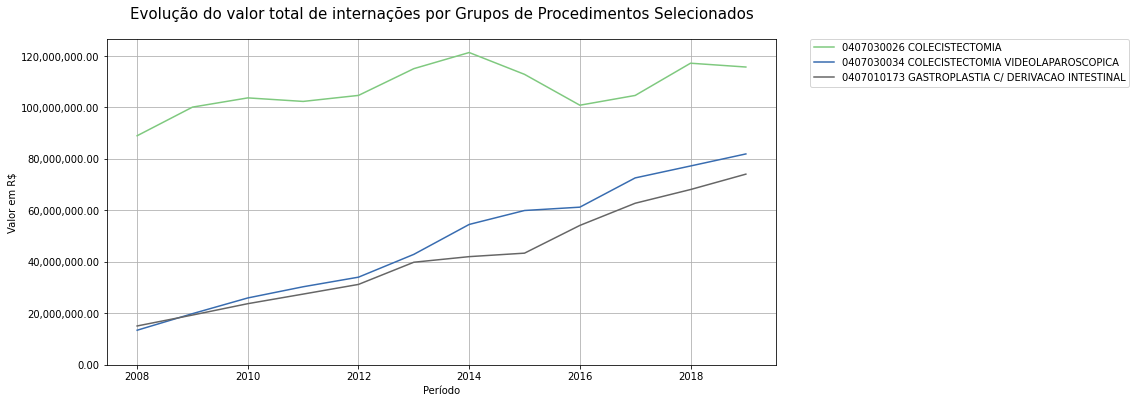

In [28]:
#Gráfico com procedimentos selecionados

colunas = base_ap_digestivo_filtro_ordenado.columns[0:len(base_ap_digestivo_filtro_ordenado.columns)]
ax = base_ap_digestivo_filtro_ordenado[colunas].head(3).T.plot(figsize=(12,6), colormap='Accent',grid=True)
plt.title('Evolução do valor total de internações por Grupos de Procedimentos Selecionados', fontsize=15,pad=20);
#altera a formatação do eixo y para um float com duas casas decimais - incluindo o separador
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# Colocando a legenda à direita do plot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel('Período')
ax.set_ylabel('Valor em R$');
plt.ylim(0)




---

Definição entre Colecistectomia e Gastroplastia para prosseguir o estudo... 

1) Apesar de um constante aumento do Valor Total do Procedimento em Colecistecomia por Videlaparoscopia , em determinado período Houve queda no Valor total do Procedimento Colecistectomia. Por se tratarem da mesma cirurgia, apenas com **técnicas diferentes**, é explicável o porquê da queda de uma e o aumento de outra.

2-)Outro ponto que destaco, é que, a gastroplastia é um procedimento de **caráter eletivo** em 100% dos casos;

3-) O valor Total da Cirurgia Bariatríca vem com uma **evolução constante**, além de ser um tema que me interesso mais pela possibilidade de fazer um link mais fácil com dados de incidência de obesidade que temos no País.



**Resultado: Gastroplastia escolhida**


## Gastroplastia

Agora com a definição do tema, vejo a necessidade de trazer os dados mensalmente, diferentemente do que fiz até agora, onde estava fazendo uma análise mais genérica para definir qual procedimento iria estudar;

In [29]:
##Importando dados de Valor_total Gastroplastia por mês de atendimento

dados_bariatrica = pd.read_csv ('/content/drive/My Drive/Data Science/bootcamp Alura/Módulo 1/Super Desafio/Bases/bariatrica_vt.csv',encoding='ISO-8859-1',sep=';', skiprows=5, skipfooter=12, decimal=',',na_values='-')
dados_bariatrica.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5702.38,NaN,NaN,7262.74,NaN,NaN,NaN,12463.64,NaN,NaN,7167.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6339.4,18537.16,12427.14,18436.00,6145.00,NaN,NaN,NaN,NaN,12318.02,NaN,6168.35,NaN,NaN,NaN,NaN,NaN,860673.45
1,15 Pará,NaN,NaN,NaN,NaN,4730.32,4730.32,16001.36,10262.64,NaN,9994.69,19972.24,19721.52,22129.23,32530.83,15088.01,4614.82,18020.70,5686.63,39880.83,15487.73,27436.74,28374.23,38847.70,23166.60,22660.51,23175.94,11348.61,23316.44,22701.89,11438.49,27383.22,22738.74,11358.60,17048.60,21777.31,11873.52,22674.52,11703.31,17038.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003679.79
2,17 Tocantins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7462.24,12596.67,4415.00,3754.22,NaN,5310.80,19331.64,4620.87,15247.65,6170.08,4640.85,4176.79,14035.54,4167.17,5179.24,NaN,NaN,5114.62,NaN,4180.12,8296.24,NaN,6138.45,NaN,9373.21,6143.03,NaN,10934.60,4335.17,6309.38,NaN,...,17946.05,24689.39,12309.05,6145.00,6145.00,6145.0,6169.0,17724.45,12296.35,12299.34,24657.50,17834.35,18557.60,18628.75,24852.90,12296.35,12290.00,12302.70,12081.10,24592.70,12302.7,17698.4,24618.1,24235.59,18466.75,17927.00,12296.35,6145.00,30750.4,36973.41,30534.50,35928.52,30767.77,29246.76,NaN,NaN,NaN,NaN,NaN,1731371.11
3,21 Maranhão,NaN,NaN,4730.32,10693.62,NaN,14244.62,NaN,NaN,4614.82,8911.23,6163.84,9229.64,NaN,11557.68,NaN,18990.01,10358.48,5259.48,10358.48,NaN,NaN,NaN,6362.78,12827.42,NaN,5179.24,NaN,NaN,NaN,NaN,NaN,NaN,14464.98,NaN,NaN,NaN,5179.24,NaN,NaN,...,17958.17,NaN,22152.16,35052.53,23016.89,60591.0,NaN,47325.83,29766.71,47243.58,35069.33,11987.40,42507.82,35994.02,49818.25,25886.30,43252.75,44683.36,24676.29,30732.19,NaN,18440.8,6145.0,38209.45,61761.35,18531.42,30890.62,37014.79,43175.9,20117.64,6179.32,44375.04,32495.38,24714.29,NaN,NaN,NaN,NaN,NaN,1970315.81
4,22 Piauí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6145.00,6145.00,NaN,NaN,NaN,NaN,NaN,12290.00


Apenas 23 UF, não contempla todas (nem todos estados devem realizar cirurgias bariátricas)


Apesar de repetitivo, irei seguir a **mesma metodologia**, ao menos inicialmente, do que fiz até agora. Creio que com esse tipo de análise, consigo ter uma boa visualização dos valores de internações, para aí sim decidir em qual caminho devo seguir.

*A única coisa que irei mudar é que já irei ordenar pelos maiores valores, para ganhar efetividade em algumas etapas*

In [30]:
#Visualizando colunas
colunas_usaveis_bariatrica = dados_bariatrica.mean().index.tolist()
colunas_usaveis_bariatrica.insert(0,'Unidade da Federação')
print(colunas_usaveis)

['Grupo procedimento', '1989', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Total']


In [31]:
#fazendo um slice só com as colunas numéricas
usaveis_bariatrica = dados_bariatrica[['Unidade da Federação','2012/Jan', '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai', '2012/Jun', '2012/Jul', '2012/Ago', '2012/Set', '2012/Out', '2012/Nov', '2012/Dez', '2013/Jan', '2013/Fev', '2013/Mar', '2013/Abr', '2013/Mai', '2013/Jun', '2013/Jul', '2013/Ago', '2013/Set', '2013/Out', '2013/Nov', '2013/Dez', '2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun', '2014/Jul', '2014/Ago', '2014/Set', '2014/Out', '2014/Nov', '2014/Dez', '2015/Jan', '2015/Fev', '2015/Mar', '2015/Abr', '2015/Mai', '2015/Jun', '2015/Jul', '2015/Ago', '2015/Set', '2015/Out', '2015/Nov', '2015/Dez', '2016/Jan', '2016/Fev', '2016/Mar', '2016/Abr', '2016/Mai', '2016/Jun', '2016/Jul', '2016/Ago', '2016/Set', '2016/Out', '2016/Nov', '2016/Dez', '2017/Jan', '2017/Fev', '2017/Mar', '2017/Abr', '2017/Mai', '2017/Jun', '2017/Jul', '2017/Ago', '2017/Set', '2017/Out', '2017/Nov', '2017/Dez', '2018/Jan', '2018/Fev', '2018/Mar', '2018/Abr', '2018/Mai', '2018/Jun', '2018/Jul', '2018/Ago', '2018/Set', '2018/Out', '2018/Nov', '2018/Dez', '2019/Jan', '2019/Fev', '2019/Mar', '2019/Abr', '2019/Mai', '2019/Jun', '2019/Jul', '2019/Ago', '2019/Set', '2019/Out', '2019/Nov', '2019/Dez']]
usaveis_bariatrica.head()

,Unidade da Federação,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
0,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5272.64,5225.94,NaN,NaN,NaN,NaN,NaN,9716.00,10840.72,13429.37,NaN,20622.31,5411.02,NaN,NaN,NaN,NaN,6987.99,NaN,12346.49,4604.0,4697.4,7303.70,NaN,12986.51,5677.12,18307.48,39477.26,11952.70,...,31001.24,12569.04,18472.36,NaN,37561.15,NaN,NaN,6145.00,18528.40,5702.38,NaN,NaN,7262.74,NaN,NaN,NaN,12463.64,NaN,NaN,7167.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6339.4,18537.16,12427.14,18436.00,6145.00,NaN,NaN,NaN,NaN
1,15 Pará,NaN,16625.92,44762.02,31283.54,38989.51,62160.46,39959.79,37470.27,23813.40,NaN,NaN,NaN,29031.02,22784.24,52343.84,46816.99,61390.38,60734.81,8093.28,33510.50,27465.71,58124.55,47125.48,19972.76,32296.96,13951.14,18606.95,25058.10,28578.81,20212.23,NaN,NaN,6287.86,6197.7,NaN,NaN,NaN,19047.42,13416.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17 Tocantins,20082.23,15687.56,19136.49,4156.12,30037.01,20673.63,5179.24,36796.12,5179.24,16013.05,14495.30,10358.48,10516.16,12906.43,4164.12,5643.35,29650.44,10520.00,NaN,NaN,NaN,11274.00,17451.40,5637.00,18435.00,18435.00,18524.40,17431.70,17933.35,6145.00,NaN,NaN,10256.40,18435.0,NaN,12335.10,18435.00,18435.00,12296.35,...,NaN,6145.00,12387.20,NaN,6151.35,18467.40,24624.45,18467.40,24657.50,17946.05,24689.39,12309.05,6145.00,6145.00,6145.0,6169.0,17724.45,12296.35,12299.34,24657.50,17834.35,18557.60,18628.75,24852.90,12296.35,12290.00,12302.70,12081.10,24592.70,12302.7,17698.4,24618.1,24235.59,18466.75,17927.00,12296.35,6145.00,30750.4,36973.41,30534.50
3,21 Maranhão,NaN,NaN,NaN,NaN,25506.24,30020.32,20716.96,10358.48,26032.61,17572.24,10358.48,NaN,NaN,7826.11,NaN,NaN,NaN,NaN,NaN,NaN,5842.40,NaN,11684.80,NaN,NaN,NaN,NaN,NaN,20609.94,6145.00,NaN,23564.0,24582.52,23564.0,6145.00,NaN,6145.00,NaN,11782.00,...,23769.10,37832.65,6771.98,16764.15,45625.80,26642.71,19464.57,11374.86,22831.84,17958.17,NaN,22152.16,35052.53,23016.89,60591.0,NaN,47325.83,29766.71,47243.58,35069.33,11987.40,42507.82,35994.02,49818.25,25886.30,43252.75,44683.36,24676.29,30732.19,NaN,18440.8,6145.0,38209.45,61761.35,18531.42,30890.62,37014.79,43175.9,20117.64,6179.32
4,22 Piauí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#setando o index
usaveis_bariatrica = usaveis_bariatrica.set_index('Unidade da Federação')


In [33]:
usaveis_bariatrica.head()

,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5272.64,5225.94,NaN,NaN,NaN,NaN,NaN,9716.00,10840.72,13429.37,NaN,20622.31,5411.02,NaN,NaN,NaN,NaN,6987.99,NaN,12346.49,4604.0,4697.4,7303.70,NaN,12986.51,5677.12,18307.48,39477.26,11952.70,33747.94,...,31001.24,12569.04,18472.36,NaN,37561.15,NaN,NaN,6145.00,18528.40,5702.38,NaN,NaN,7262.74,NaN,NaN,NaN,12463.64,NaN,NaN,7167.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6339.4,18537.16,12427.14,18436.00,6145.00,NaN,NaN,NaN,NaN
15 Pará,NaN,16625.92,44762.02,31283.54,38989.51,62160.46,39959.79,37470.27,23813.40,NaN,NaN,NaN,29031.02,22784.24,52343.84,46816.99,61390.38,60734.81,8093.28,33510.50,27465.71,58124.55,47125.48,19972.76,32296.96,13951.14,18606.95,25058.10,28578.81,20212.23,NaN,NaN,6287.86,6197.7,NaN,NaN,NaN,19047.42,13416.59,13406.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17 Tocantins,20082.23,15687.56,19136.49,4156.12,30037.01,20673.63,5179.24,36796.12,5179.24,16013.05,14495.30,10358.48,10516.16,12906.43,4164.12,5643.35,29650.44,10520.00,NaN,NaN,NaN,11274.00,17451.40,5637.00,18435.00,18435.00,18524.40,17431.70,17933.35,6145.00,NaN,NaN,10256.40,18435.0,NaN,12335.10,18435.00,18435.00,12296.35,24075.12,...,NaN,6145.00,12387.20,NaN,6151.35,18467.40,24624.45,18467.40,24657.50,17946.05,24689.39,12309.05,6145.00,6145.00,6145.0,6169.0,17724.45,12296.35,12299.34,24657.50,17834.35,18557.60,18628.75,24852.90,12296.35,12290.00,12302.70,12081.10,24592.70,12302.7,17698.4,24618.1,24235.59,18466.75,17927.00,12296.35,6145.00,30750.4,36973.41,30534.50
21 Maranhão,NaN,NaN,NaN,NaN,25506.24,30020.32,20716.96,10358.48,26032.61,17572.24,10358.48,NaN,NaN,7826.11,NaN,NaN,NaN,NaN,NaN,NaN,5842.40,NaN,11684.80,NaN,NaN,NaN,NaN,NaN,20609.94,6145.00,NaN,23564.0,24582.52,23564.0,6145.00,NaN,6145.00,NaN,11782.00,11860.10,...,23769.10,37832.65,6771.98,16764.15,45625.80,26642.71,19464.57,11374.86,22831.84,17958.17,NaN,22152.16,35052.53,23016.89,60591.0,NaN,47325.83,29766.71,47243.58,35069.33,11987.40,42507.82,35994.02,49818.25,25886.30,43252.75,44683.36,24676.29,30732.19,NaN,18440.8,6145.0,38209.45,61761.35,18531.42,30890.62,37014.79,43175.9,20117.64,6179.32
22 Piauí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Criando Total
usaveis_bariatrica['Total'] =  usaveis_bariatrica.sum(axis=1)


In [35]:
#Ordenanado
ordenado_por_total_bariatrica = usaveis_bariatrica.sort_values('Total',ascending=False)
ordenado_por_total_bariatrica = ordenado_por_total_bariatrica.drop('Total', axis=1)
ordenado_por_total_bariatrica.head()

,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41 Paraná,1092756.64,982023.11,1319117.38,1043737.89,1404447.96,1203349.63,1156974.08,1326557.77,1238497.23,1532705.44,1334985.38,1015009.84,1349927.25,1206434.29,1254635.71,1732872.64,1647315.82,1680401.17,1814750.78,1816574.05,1837622.28,1934750.08,1799012.23,1188547.40,1457465.59,1859197.40,1818662.09,1476054.58,1639357.68,1713356.87,1908583.79,1751390.72,1840046.94,1845131.93,1448932.84,1189646.53,1428420.02,1537280.82,1934552.61,1718547.08,...,2308142.69,2477126.33,2503007.81,1666050.02,2728429.25,2761885.46,3486330.15,2963747.26,3365011.07,3266608.64,3298591.20,3735507.26,2855661.93,3485920.84,3290970.37,2810005.84,3156462.28,2932006.96,3414561.34,3731596.52,3819711.12,3667334.86,4128836.25,4431602.26,3747069.37,4322310.74,3652209.16,2658536.82,3896757.99,4079248.30,3757592.39,4210223.91,4357034.49,3723311.38,5112920.21,4157210.95,4236520.49,4255565.53,3710181.34,3127729.06
35 São Paulo,736441.69,584637.12,638909.97,561249.50,670540.96,704526.45,784959.35,897723.42,1077493.00,954779.56,764253.09,648590.87,825134.89,757841.30,894545.89,1052537.47,1117945.24,896874.50,1026859.50,1022948.85,1123077.55,1149079.58,934113.82,625641.42,881439.72,869891.02,811619.19,772770.63,875713.52,817080.36,911646.52,1018244.34,1025876.89,1034225.73,924802.28,734897.91,687695.82,787109.89,942648.21,779043.95,...,794712.03,815869.50,912219.20,564988.64,626334.97,680736.82,866747.36,741633.72,929296.41,853097.16,1028794.13,1009856.92,851794.79,799754.95,823717.93,688970.44,872354.56,789371.48,779313.21,907352.09,797502.44,753566.62,816387.17,1016854.62,878985.54,999779.00,764005.93,616189.38,927640.00,931974.21,894037.28,910100.56,847003.67,714193.24,823475.11,889409.94,762837.95,886651.93,931387.05,577812.22
31 Minas Gerais,99359.47,50487.37,63063.65,63823.43,88723.12,76715.11,68190.84,59131.92,74417.89,61834.65,64299.61,20934.96,42224.38,47763.29,92318.53,86850.52,96493.16,185690.82,128671.48,130909.54,180305.44,243077.21,182578.65,164284.70,212556.14,236844.67,183448.29,285698.20,329665.72,263770.86,150279.02,239258.34,463381.72,363915.55,241749.08,207773.99,274972.92,241268.97,366873.24,238376.78,...,394089.42,510339.84,476777.48,418257.76,413106.17,348865.30,491655.55,366032.06,464514.54,332476.43,569333.57,525354.18,481052.11,566792.23,509046.25,335822.67,413665.95,387585.78,408470.76,553996.73,583806.42,492529.78,591494.57,590929.60,446183.09,535263.74,491745.40,390157.18,482772.17,443471.35,454899.25,510845.19,467238.27,481859.82,518228.17,370356.34,455243.02,617041.26,581263.25,468251.60
32 Espírito Santo,61435.88,92662.95,124881.82,78377.46,114034.84,135345.55,111409.17,114918.33,109610.85,175933.30,98951.72,130688.29,88842.19,71869.82,143790.45,93063.95,148214.75,148792.35,190585.61,142033.01,120261.69,242634.14,162181.65,122207.80,64955.77,141058.97,140669.23,151371.15,261539.83,215806.47,231140.36,205673.03,191865.48,160202.80,220991.15,215426.87,166717.71,236393.34,318381.14,227779.43,...,225835.78,341250.30,371165.86,364593.56,353046.80,337817.89,273190.81,277281.37,379941.45,336103.90,310725.54,366672.11,330171.69,308404.92,339465.40,306163.04,329499.10,270359.84,310730.75,321651.75,418577.42,253448.28,369986.50,349

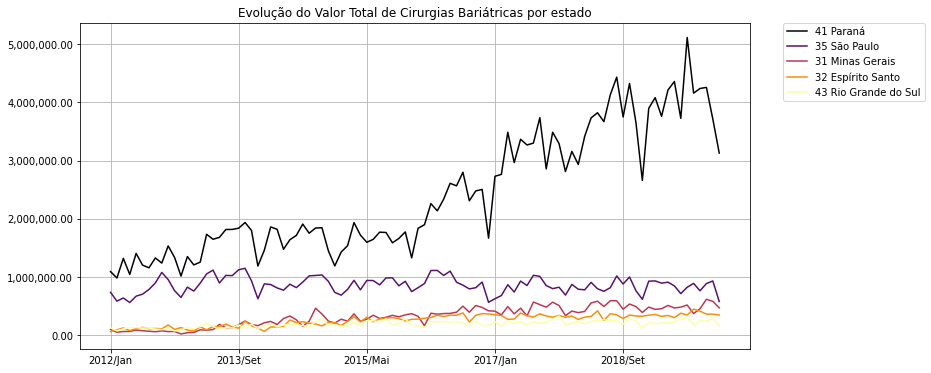

In [36]:
#Verificar evolução bariátrica
ax = ordenado_por_total_bariatrica.head(5).T.plot(figsize=(12,6),colormap='inferno',grid=True)
# Colocando a legenda à direita do plot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.title('Evolução do Valor Total de Cirurgias Bariátricas por estado')
#altera a formatação do eixo y para um float com duas casas decimais - incluindo o separador
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

O estado do Paraná, desde 2012, apresenta um valor total gasto com gastroplastia **maior do que o estado que São Paulo**. Algo que me surpreendeu bastante. 

Além disso, o valor gasto em cirurgias bariátrias me parece estável (sem algum aumento expressivo) na maioria dos estados, exceto o PR.

A partir de agora, me surgem alguns questionamentos: 

*   Será que o **Paraná** tem **mais obesos** do que os estados presentes nos gráficos?
*   Estamos olhando o valor total absoulto, será que o v**alor relativo (por população)** apontaria o Paraná ainda como o que tem mais gastos relacionados a bariátrica?



**Será que o Paraná tem mais obesos do que os estados presentes nos gráficos?**

Na verdade **não.** O Paraná não aparece em nehuma pesquisa como um dos estados com maior prevalência de obesos na população. Seguem fontes:

https://abeso.org.br/obesidade-e-sindrome-metabolica/mapa-da-obesidade/

https://agenciabrasil.ebc.com.br/saude/noticia/2018-06/regioes-norte-e-centro-oeste-tem-os-maiores-indices-de-obesidade



Após responder a primeira pergunta, vamos seguir para a segunda: 
**Será que o valor relativo (por população) apontaria o Paraná ainda como o que tem mais gastos relacionados a bariátrica?**

Para dar continuidade, irei fazer uma tratativa dos dados, para trazer algumas outras visões, antes de buscar a população e fazer uma análise por valores relativos:

In [37]:
#incluindo coluna total
ordenado_por_total_bariatrica['Total'] =  ordenado_por_total_bariatrica.sum(axis=1)
ordenado_por_total_bariatrica.head()

,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41 Paraná,1092756.64,982023.11,1319117.38,1043737.89,1404447.96,1203349.63,1156974.08,1326557.77,1238497.23,1532705.44,1334985.38,1015009.84,1349927.25,1206434.29,1254635.71,1732872.64,1647315.82,1680401.17,1814750.78,1816574.05,1837622.28,1934750.08,1799012.23,1188547.40,1457465.59,1859197.40,1818662.09,1476054.58,1639357.68,1713356.87,1908583.79,1751390.72,1840046.94,1845131.93,1448932.84,1189646.53,1428420.02,1537280.82,1934552.61,1718547.08,...,2477126.33,2503007.81,1666050.02,2728429.25,2761885.46,3486330.15,2963747.26,3365011.07,3266608.64,3298591.20,3735507.26,2855661.93,3485920.84,3290970.37,2810005.84,3156462.28,2932006.96,3414561.34,3731596.52,3819711.12,3667334.86,4128836.25,4431602.26,3747069.37,4322310.74,3652209.16,2658536.82,3896757.99,4079248.30,3757592.39,4210223.91,4357034.49,3723311.38,5112920.21,4157210.95,4236520.49,4255565.53,3710181.34,3127729.06,2.313315e+08
35 São Paulo,736441.69,584637.12,638909.97,561249.50,670540.96,704526.45,784959.35,897723.42,1077493.00,954779.56,764253.09,648590.87,825134.89,757841.30,894545.89,1052537.47,1117945.24,896874.50,1026859.50,1022948.85,1123077.55,1149079.58,934113.82,625641.42,881439.72,869891.02,811619.19,772770.63,875713.52,817080.36,911646.52,1018244.34,1025876.89,1034225.73,924802.28,734897.91,687695.82,787109.89,942648.21,779043.95,...,815869.50,912219.20,564988.64,626334.97,680736.82,866747.36,741633.72,929296.41,853097.16,1028794.13,1009856.92,851794.79,799754.95,823717.93,688970.44,872354.56,789371.48,779313.21,907352.09,797502.44,753566.62,816387.17,1016854.62,878985.54,999779.00,764005.93,616189.38,927640.00,931974.21,894037.28,910100.56,847003.67,714193.24,823475.11,889409.94,762837.95,886651.93,931387.05,577812.22,8.245760e+07
31 Minas Gerais,99359.47,50487.37,63063.65,63823.43,88723.12,76715.11,68190.84,59131.92,74417.89,61834.65,64299.61,20934.96,42224.38,47763.29,92318.53,86850.52,96493.16,185690.82,128671.48,130909.54,180305.44,243077.21,182578.65,164284.70,212556.14,236844.67,183448.29,285698.20,329665.72,263770.86,150279.02,239258.34,463381.72,363915.55,241749.08,207773.99,274972.92,241268.97,366873.24,238376.78,...,510339.84,476777.48,418257.76,413106.17,348865.30,491655.55,366032.06,464514.54,332476.43,569333.57,525354.18,481052.11,566792.23,509046.25,335822.67,413665.95,387585.78,408470.76,553996.73,583806.42,492529.78,591494.57,590929.60,446183.09,535263.74,491745.40,390157.18,482772.17,443471.35,454899.25,510845.19,467238.27,481859.82,518228.17,370356.34,455243.02,617041.26,581263.25,468251.60,3.106748e+07
32 Espírito Santo,61435.88,92662.95,124881.82,78377.46,114034.84,135345.55,111409.17,114918.33,109610.85,175933.30,98951.72,130688.29,88842.19,71869.82,143790.45,93063.95,148214.75,148792.35,190585.61,142033.01,120261.69,242634.14,162181.65,122207.80,64955.77,141058.97,140669.23,151371.15,261539.83,215806.47,231140.36,205673.03,191865.48,160202.80,220991.15,215426.87,166717.71,236393.34,318381.14,227779.43,...,341250.30,371165.86,364593.56,353046.80,337817.89,273190.81,277281.37,379941.45,336103.90,310725.54,366672.11,330171.69,308404.92,339465.40,306163.04,329499.10,270359.84,310730.75,321651.75,418577.42,253448.28,369986.50,349807.2

In [38]:
#DF somente com UF e coluna Total
total_bariatrica=  ordenado_por_total_bariatrica['Total']
total_bariatrica.head()

Unidade da Federação
41 Paraná               2.313315e+08
35 São Paulo            8.245760e+07
31 Minas Gerais         3.106748e+07
32 Espírito Santo       2.444475e+07
43 Rio Grande do Sul    1.831342e+07
Name: Total, dtype: float64

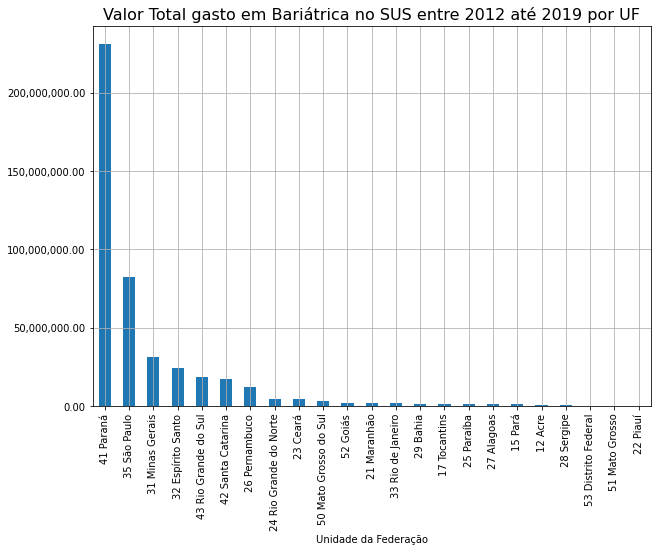

In [39]:
#Valor total - Gráfico de barras uf
ax = total_bariatrica.plot(x='Unidade da Federação', y='Total', kind='bar', figsize=(10,7),grid=True);
#altera a formatação do eixo y para um float com duas casas decimais - incluindo o separador
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor Total gasto em Bariátrica no SUS entre 2012 até 2019 por UF', fontsize=16)
plt.show()

In [40]:
#Verificando propoproção dos gastos totais de bariátrica por estado, comparando com o Paraná
(total_bariatrica / total_bariatrica.loc['41 Paraná']).head()

Unidade da Federação
41 Paraná               1.000000
35 São Paulo            0.356448
31 Minas Gerais         0.134299
32 Espírito Santo       0.105670
43 Rio Grande do Sul    0.079165
Name: Total, dtype: float64

Text(0.5, 1.0, 'Proporção do valor total gaasto de bariátrica dos estados pelo valor gasto no Paraná')

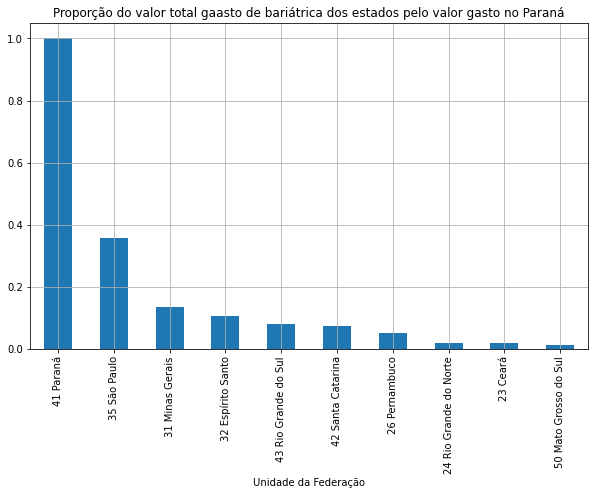

In [41]:
#Gráfico de barras
(total_bariatrica / total_bariatrica.loc['41 Paraná']).head(10).plot(kind='bar',grid=True,figsize=(10,6))
plt.title ('Proporção do valor total gaasto de bariátrica dos estados pelo valor gasto no Paraná')

Percebe-se quue o Paraná gasta quase 3 vezes mais que o estado de São Paulo e, desta forma seguirei a análise com o objetivo de verificar o Valor relativo;

### Poulação por estado - Tratativa de dados

Ajuste no DF para fazer um join com a base de população

In [42]:
#UFS
ufs = total_bariatrica.index
print(ufs)

Index(['41 Paraná', '35 São Paulo', '31 Minas Gerais', '32 Espírito Santo',
       '43 Rio Grande do Sul', '42 Santa Catarina', '26 Pernambuco',
       '24 Rio Grande do Norte', '23 Ceará', '50 Mato Grosso do Sul',
       '52 Goiás', '21 Maranhão', '33 Rio de Janeiro', '29 Bahia',
       '17 Tocantins', '25 Paraíba', '27 Alagoas', '15 Pará', '12 Acre',
       '28 Sergipe', '53 Distrito Federal', '51 Mato Grosso', '22 Piauí'],
      dtype='object', name='Unidade da Federação')


In [43]:
#tratando nomes das Unidades de federação
ufs_without_numbers = []
for uf in ufs:
  uf_without_number = uf[3:]
  ufs_without_numbers.append(uf_without_number)

print(ufs_without_numbers)

['Paraná', 'São Paulo', 'Minas Gerais', 'Espírito Santo', 'Rio Grande do Sul', 'Santa Catarina', 'Pernambuco', 'Rio Grande do Norte', 'Ceará', 'Mato Grosso do Sul', 'Goiás', 'Maranhão', 'Rio de Janeiro', 'Bahia', 'Tocantins', 'Paraíba', 'Alagoas', 'Pará', 'Acre', 'Sergipe', 'Distrito Federal', 'Mato Grosso', 'Piauí']


In [44]:
#Ajustando DF - total_bariatrica
total_bariatrica.index = ufs_without_numbers
total_bariatrica.head()

Paraná               2.313315e+08
São Paulo            8.245760e+07
Minas Gerais         3.106748e+07
Espírito Santo       2.444475e+07
Rio Grande do Sul    1.831342e+07
Name: Total, dtype: float64

In [45]:
#Ajustando index Valor total
total_bariatrica = total_bariatrica.reset_index(name='Valor Total')


In [46]:
#Ajuste nome de colunas
total_bariatrica.rename(columns={'index':'UF'}, inplace=True)
total_bariatrica.head()

,UF,Valor Total
0,Paraná,2.313315e+08
1,São Paulo,8.245760e+07
2,Minas Gerais,3.106748e+07
3,Espírito Santo,2.444475e+07
4,Rio Grande do Sul,1.831342e+07


In [47]:
# Lendo a tabela do IBGE
populacao_uf = pd.read_excel ('/content/drive/My Drive/Data Science/bootcamp Alura/Módulo 1/Super Desafio/Bases/tabela6579.xlsx')
populacao_uf

,UF,População
0,Rondônia,1796460
1,Acre,894470
2,Amazonas,4207714
3,Roraima,631181
4,Pará,8690745
5,Amapá,861773
6,Tocantins,1590248
7,Maranhão,7114598
8,Piauí,3281480
9,Ceará,9187103


In [48]:
populacao_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   UF         27 non-null     object
 1   População  27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes


In [49]:
populacao_uf = populacao_uf.reset_index()
populacao_uf.rename(columns={'UF [-]':'UF',
                              'População': 'População Absoluta'},
                      inplace=True)
populacao_uf.head()

,index,UF,População Absoluta
0,0,Rondônia,1796460
1,1,Acre,894470
2,2,Amazonas,4207714
3,3,Roraima,631181
4,4,Pará,8690745


In [50]:
total_bariatrica_pop = pd.merge(total_bariatrica,populacao_uf, on = 'UF')

total_bariatrica_pop = total_bariatrica_pop.drop('index',axis=1)

total_bariatrica_pop.head()

,UF,Valor Total,População Absoluta
0,Paraná,2.313315e+08,11516840
1,São Paulo,8.245760e+07,46289333
2,Minas Gerais,3.106748e+07,21292666
3,Espírito Santo,2.444475e+07,4064052
4,Rio Grande do Sul,1.831342e+07,11422973


In [51]:
#Transformmando dado de Valor total em int64
total_bariatrica_pop['Valor Total'] = total_bariatrica_pop['Valor Total'].astype('int64')
total_bariatrica_pop.head()


,UF,Valor Total,População Absoluta
0,Paraná,231331484,11516840
1,São Paulo,82457595,46289333
2,Minas Gerais,31067475,21292666
3,Espírito Santo,24444752,4064052
4,Rio Grande do Sul,18313417,11422973


In [52]:
#Criando coluna gasto/habitante
total_bariatrica_pop['Valor Total/pop'] = total_bariatrica_pop['Valor Total'] / total_bariatrica_pop['População Absoluta']
total_bariatrica_pop.head()

,UF,Valor Total,População Absoluta,Valor Total/pop
0,Paraná,231331484,11516840,20.086368
1,São Paulo,82457595,46289333,1.781352
2,Minas Gerais,31067475,21292666,1.459069
3,Espírito Santo,24444752,4064052,6.014872
4,Rio Grande do Sul,18313417,11422973,1.603209


In [53]:
#Ordenando por gasto/habitante
total_bariatrica_pop = total_bariatrica_pop.sort_values('Valor Total/pop',ascending=False)
total_bariatrica_pop.head()

,UF,Valor Total,População Absoluta,Valor Total/pop
0,Paraná,231331484,11516840,20.086368
3,Espírito Santo,24444752,4064052,6.014872
5,Santa Catarina,17349866,7252502,2.392259
1,São Paulo,82457595,46289333,1.781352
4,Rio Grande do Sul,18313417,11422973,1.603209


In [54]:
#setando UF como index

total_bariatrica_pop = total_bariatrica_pop.set_index('UF')

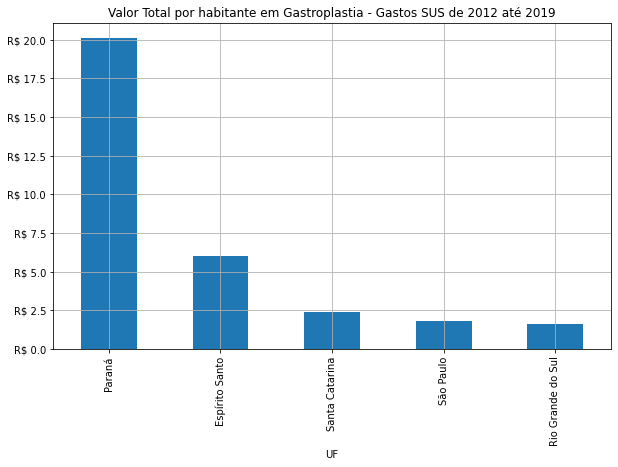

In [55]:
# aqui vamos visualizar nossos dados
ax = total_bariatrica_pop.head().plot(y='Valor Total/pop', kind='bar', figsize=(10,6),grid=True,legend=False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:}'))
plt.title('Valor Total por habitante em Gastroplastia - Gastos SUS de 2012 até 2019');

Analisando o valor total **gasto por habitante,** percebe-se que o **Paraná ainda lidera com folga.**

Seguirei minha empreitada em Gastroplastia, mas agora focado apenas no Paraná, pois até agora, esses dados me surpreenderam bastante e gostaria de entender e trazer uma possível **explicação** do porquê esse estado gasta tanto com esse tipo de procedimento, se comparado aos outros.



### Dados - Estado Paraná 

Para prosseguir o estudo, irei abrir os dados do Estado do Paraná **por Estabelicimento (hospitais)**

Decidi trazer a **base por ano** e não ano/mês - pois trata-se de um dado mais granular e gostaria de agrupar o possível para ter uma visibilidade geral;


Outro ponto importante a se destacar é  que, até o momento, eu estava apenas usando o valor total por procedimento e decidi buscar os dados do Paraná por **número de internações**, pois assim acredito que consiga visualizar exatamente o que está **causando os altos custos** com Bariátrica: Se é o Custo Médio ou o número de internações que vem aumentando ao longo do período estudado.

In [61]:
##Importando dados de número de internações bariátricas - por estabelicimento no estado do Paraná

bariatrica_parana = pd.read_csv ('/content/drive/My Drive/Data Science/bootcamp Alura/Módulo 1/Super Desafio/Bases/parana_bariatrica.csv',encoding='ISO-8859-1',sep=';', skiprows=4, skipfooter=13, decimal=',',na_values='-')
bariatrica_parana.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Estabelecimento,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,0013633 HOSPITAL ANGELINA CARON,1.0,635.0,751.0,954.0,795.0,811.0,1158.0,1373.0,1165.0,2252.0,3555.0,3873.0,4047.0,756.0,22126
1,0013838 HOSPITAL SAO LUCAS,NaN,NaN,NaN,133.0,349.0,442.0,405.0,296.0,301.0,229.0,218.0,140.0,94.0,15.0,2622
2,0013846 HOSPITAL DO ROCIO,NaN,NaN,NaN,NaN,NaN,139.0,285.0,125.0,230.0,247.0,333.0,307.0,391.0,61.0,2118
3,0015245 HOSPITAL UNIVERSITARIO EVANGELICO MACK...,NaN,NaN,NaN,39.0,77.0,42.0,34.0,26.0,104.0,41.0,78.0,64.0,60.0,10.0,575
4,0015334 HOSPITAL SANTA CASA DE CURITIBA,3.0,223.0,519.0,624.0,693.0,705.0,740.0,665.0,609.0,572.0,610.0,704.0,702.0,171.0,7540


Seguirei o **mesmo método** feito em todas as outras análise. Até agora, me trouxe resultados positivos, trazendo informações importantes;

In [57]:
##Visualizando colunas
#Visualizando colunas
colunas_usaveis_bariatrica_pr = bariatrica_parana.mean().index.tolist()
colunas_usaveis_bariatrica_pr.insert(0,'Estabelecimento')
print(colunas_usaveis_bariatrica_pr)

['Estabelecimento', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Total']


In [58]:
#Slice e ajuste index na base
bariatrica_parana = bariatrica_parana[['Estabelecimento','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
bariatrica_parana =bariatrica_parana.set_index('Estabelecimento')
bariatrica_parana.head()

,2012,2013,2014,2015,2016,2017,2018,2019
Estabelecimento,,,,,,,,
0013633 HOSPITAL ANGELINA CARON,811.0,1158.0,1373.0,1165.0,2252.0,3555.0,3873.0,4047.0
0013838 HOSPITAL SAO LUCAS,442.0,405.0,296.0,301.0,229.0,218.0,140.0,94.0
0013846 HOSPITAL DO ROCIO,139.0,285.0,125.0,230.0,247.0,333.0,307.0,391.0
0015245 HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE,42.0,34.0,26.0,104.0,41.0,78.0,64.0,60.0
0015334 HOSPITAL SANTA CASA DE CURITIBA,705.0,740.0,665.0,609.0,572.0,610.0,704.0,702.0


In [59]:
#Reajustando o total pelo período e ordenando pelo maior número de internação
bariatrica_parana['Total'] = bariatrica_parana.sum(axis=1)
bariatrica_parana_ordenado = bariatrica_parana.sort_values('Total',ascending=False)
bariatrica_parana_ordenado = bariatrica_parana_ordenado.drop('Total',axis=1)
bariatrica_parana_ordenado.head()

,2012,2013,2014,2015,2016,2017,2018,2019
Estabelecimento,,,,,,,,
0013633 HOSPITAL ANGELINA CARON,811.0,1158.0,1373.0,1165.0,2252.0,3555.0,3873.0,4047.0
0015334 HOSPITAL SANTA CASA DE CURITIBA,705.0,740.0,665.0,609.0,572.0,610.0,704.0,702.0
2580055 ISCAL,164.0,184.0,250.0,240.0,275.0,359.0,428.0,554.0
0013838 HOSPITAL SAO LUCAS,442.0,405.0,296.0,301.0,229.0,218.0,140.0,94.0
0013846 HOSPITAL DO ROCIO,139.0,285.0,125.0,230.0,247.0,333.0,307.0,391.0


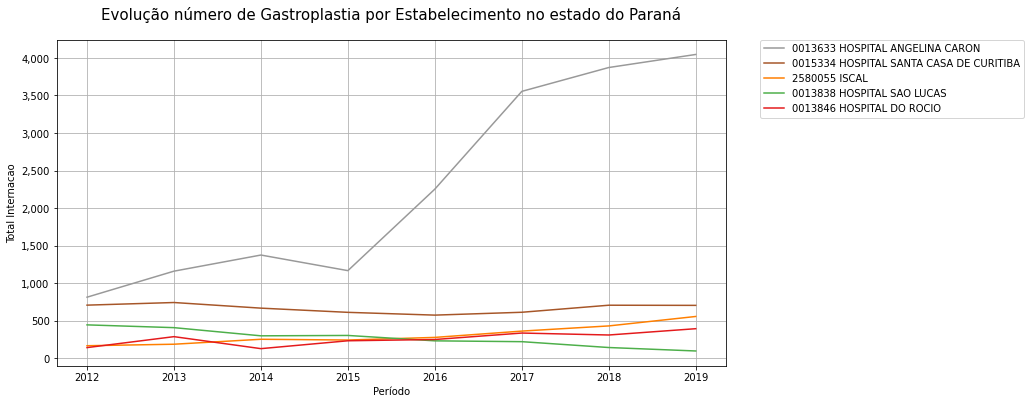

In [62]:
#plotando só a partir de 2012 (3 maiores Estabelecimentos)
ax = bariatrica_parana_ordenado.head(5).T.plot(figsize=(12,6), cmap='Set1_r',grid=True)
plt.title('Evolução número de Gastroplastia por Estabelecimento no estado do Paraná', fontsize=15,pad=20);
#altera a formatação do eixo y para um float com duas casas decimais - incluindo o separador
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Colocando a legenda à direita do plot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel('Período')
ax.set_ylabel('Total Internacao');


Devido a minha decisão de trazer o número de internações por ano e não por mês, **afetou na visualização do gráfico**, porém creio que **ainda sim**, deixou  **evidente** que alguma coisa atípica ocorreu no Hospital Angelina Caron, principalmente a partir de 2015.


Mais alguns questionamentos me surgiram:

 
* Será que o Hospital Angelina Caron se tornou o hospital referência para se realizar gastroplastia na região?
* Esse hospital é especializado em fazer Gastroplastia?
* Existe alguma irregularidade na atuação do hospital?









### Conclusão Hospital Angelina Caron

Devido ao nível de granularidade que cheguei na análise, decidi buscar no google sobre o hospital e encontrei informações relevantes que respondem basicamente todas minhas perguntas:


*  **Será que o Hospital Angelina Caron se tornou o hospital referência para se realizar gastroplastia na região?**

*   **Esse hospital é especializado em fazer Gastroplastia?**
 
R: De acordo com o Jornal União, em uma matéria realizada em Setembro de 2019, o Hospital Angelina Caron é **líder na realização de gastroplatia no Brasil**,  realizando **58%** de todas as cirurgias no Paraná, além de representar **36%** no Brasil.

fonte: https://portaljornaluniao.com.br/2019/09/26/tudo-que-voce-precisa-saber-sobre-a-cirurgia-bariatrica/

Mesmo após essa matéria, estes números ainda me soam estranho, pois está muito **acima da média de todos os outros estados. **

Porém, um dos pontos que  me questionei é que existe a possibilidade dessa **cirurgia** estar **sub ofertada** em outras regiões/hospitais. Seguindo essa linha de raciocionío, fiz algumas pesquisas e descobri que 13 milhões de pessoas esperam por cirurgia bariátrica no SUS, segundo matéria da CBN de Curitiba: 

https://cbncuritiba.com/13-milhoes-de-pessoas-esperam-por-cirurgia-bariatrica-no-sus/


Por fim, mas não menos importante, a resposta para a seguinte pergunta:

*  ** Existe alguma irregularidade na atuação do hospital?**

Segundo o jornal CNN e o site de notícia o Uol,  Grupo que atuava com venda de cirurgia bariátrica pelo SUS **(ato ilegal)**, teria lucrado mais de R$ 10 milhões com essas operações. 
Como funcionava esse esquema? 
Pessoas envolvidas com o processo referente a cirurgia Bariátrica no Hospital Angelina Caron atuavam indo atrás de pacientes que estavam na fila de espera para realização de Bariátrica e prometiam que, de acordo com um determinado pagamento, seria possível agilizar o processo/cirurgia.

Fontes: https://noticias.uol.com.br/cotidiano/ultimas-noticias/2020/01/12/hospital-angelina-caron-pr-parana-cirurgia-bariatrica.html

https://www.cnnbrasil.com.br/nacional/2020/10/06/grupo-teria-lucrado-mais-de-r-10-mi-com-venda-de-cirurgias-bariatricas-pelo-sus






# Considerações finais- Módulo 01

Após todo o estudo realizado nesse projeto, tirei alguns **aprendizados** que gostaria de **compartilhar:**


Apesar de um estudo relativamente **simples**, utilizando os conhecimentos adquiridos no primeiro módulo, verifquei que é possível **criar** alguns **métodos** para estudo e análise com o objetivo de identificar, ao menos, anormalidades tanto em gastos, número de internações ou até mesmo usto médio de procedimentos no SUS.

Com este meu notebook, destaco a importância de, caso você não tenha nenhuma específica para ser respondida, partir de uma análise mais abrangente, para dpeois ir limitando e decidir por qual caminho seguir na sua análise. Creio que, muitas vezes, seus dados podem te dar muitas respostas interessantes de por onde você deverá se aprofundar. 

O Sistema Único de Saúde é extremamente **complexo** e é preciso ter uma certa **cautela** antes de chegar em **conclusões** possivelmente **precipitadas**. Exemplo: Não necessariamente porque uma região tem o gasto mais alto per capita, quer dizer que ela é mais ineficiente. Devemos nos questionar nos mais disveros aspectos: Distribuição da faixa etária, nível de saneamento básico, percentual da população que não tem nenhum acesso a saúde suplementar entre muitas outras variáveis.

Por fim, acredito plenamente na importância do SUS para população Brasileira , para se ter uma sustentabilidade e eficiência ao longo prazo, deve-se atuar em diversas frentes, como: **Investimento** no âmbito federal, estadual e muinicipal, Atendimento focado na **atenção Primária/Básica**, consicentização na **prevenção**, além de atuação no **combate a fraude**(como visto no estudo), que fere o principal princípio de um  sistema universal de Saúde: a **garantia do acesso justo para todos.**



